In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
import pandas as pd
import math 

# Формула, связывающая коэффициенты пьезопроводности, проницаемости и упрогоемкости пласта.
## Формула (3.44) стр 121
$$ Q_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}\dfrac{(\dfrac{\xi^2}{4\kappa t})^{\dfrac{1+\alpha}{2}}}{t}\exp^{-\dfrac{\xi^2}{4\kappa t}}$$

In [2]:
def q_xi_a(a, t, xi, v_liq=1e2, k=3e-4):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq / sc.gamma((1 + a) / 2) * (xi ** 2 / (4 * k * t)) ** ((1 + a) / 2)/ t * np.exp(-xi ** 2 / 4 / k / t)

## Формула (3.48) стр. 122
$$ V_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}Г(\dfrac{1+\alpha}{2},\dfrac{\xi^2}{4\kappa t})$$

In [4]:
def v_xi_a(a, t, xi, v_liq=1e2, k=3e-4):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq/sc.gamma((1 + a) / 2) * sc.gamma((1 + a)/2)*(1-sc.gammainc((1 + a)/2, xi ** 2 / 4 / k / t))

In [5]:
#ВАЖНО
#Неполная гамма функция для sc
sc.gamma(1/2)*(1-sc.gammainc(1/2,1))

0.2788055852806615

# Прямолинейно-параллельный поток к плоскому стоку
# $$ \alpha = 0 $$

## Фундаментальное решение для уравнения пьезопроводности для случая прямолинейно-параллельного потока к плоскому стоку
### Формула (3.28) стр 111
$$ \Delta P = ± \dfrac{V_ж}{2 \sigma \sqrt{\pi*k*t}*\beta^*}\exp^{-\dfrac{\xi^2}{4\kappa t}} $$



In [6]:
def deltaP_0(t, xi, v_liq=1e2, betta=0.0003, k=3e-4, sigma=1):
    # v_liq - [m^3] - объем жидкости, извлеченной из пласта
    # betta - [MPa^(-1)] коэффициент упругоемкости пласта
    # k -[м^2/c]- пьезопроводность
    # kpr - [м^2] - проницаемость
    # t -[c]- время
    # xi -[м]- расстояние
    # sigma -[м^2] - площадь поперечного сечения 
    return v_liq / (2 * sigma * np.sqrt(3.14 * k * t) * betta) * np.exp(-xi ** 2 / 4 / k / t)

In [7]:
## Графики понижения пластового давления в различных точках пласта после включения мгновенного стока (3.28) 
## рис. 3.7

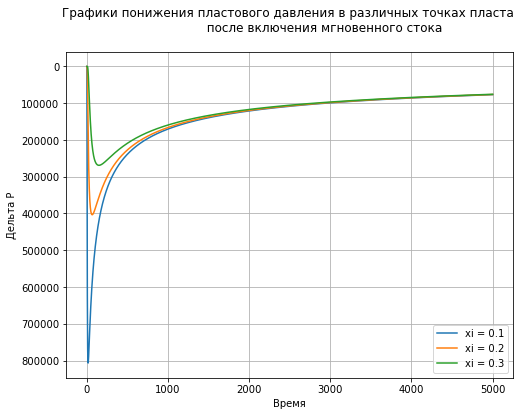

In [8]:
t = np.arange(1e-10,5000,1)
xi_1 = 0.1
xi_2 = 0.2
xi_3 = 0.3


fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(8, 6)


ax1.plot(t,deltaP_0(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,deltaP_0(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,deltaP_0(t,xi_3), label = 'xi = {}'.format(xi_3))


plt.gca().invert_yaxis()
ax1.set_xlabel("Время")
ax1.set_ylabel("Дельта P")
ax1.legend()
ax1.grid()
ax1.set_title('''Графики понижения пластового давления в различных точках пласта 
                  после включения мгновенного стока''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
plt.show()

## Семейство пьезометрических линий в различные моменты после включения мгновенного стока (3.28) 
## рис. 3.6

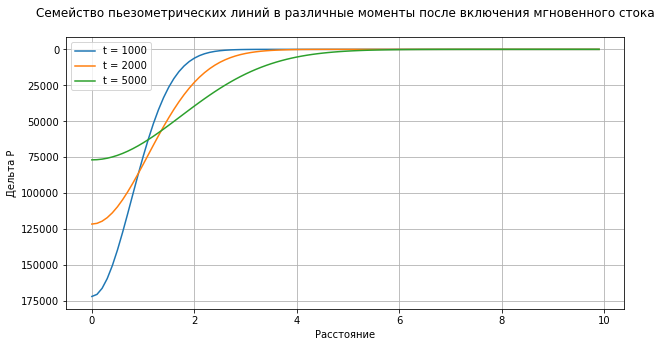

In [9]:
xi = np.arange(1e-10,10,0.1)
t_1 = 1000
t_2 = 2000
t_3 = 5000


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(10, 5)


ax1.plot(xi,deltaP_0(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,deltaP_0(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,deltaP_0(t_3,xi), label = 't = {}'.format(t_3))


plt.gca().invert_yaxis()
ax1.set_xlabel("Расстояние")
ax1.set_ylabel("Дельта P")
ax1.legend()
ax1.grid()
ax1.set_title('Семейство пьезометрических линий в различные моменты после включения мгновенного стока',
                loc = 'center',     #  значение по умолчанию
                pad = 20)

plt.show()

## Графики расхода жидкости через различные коаксиальные сечения (3.44)       
## рис. 3.8

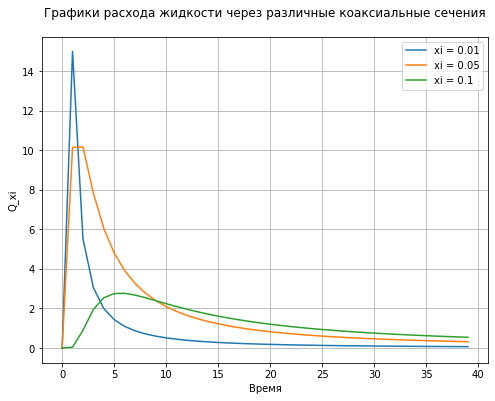

In [11]:
t = np.arange(1e-10,40,1)
xi_1 = 0.01
xi_2 = 0.05
xi_3 = 0.1


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)


ax1.plot(t,q_xi_a(0,t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,q_xi_a(0,t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,q_xi_a(0,t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.set_xlabel("Время")
ax1.set_ylabel("Q_xi")
ax1.grid()
ax1.set_title('''Графики расхода жидкости через различные коаксиальные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Графики количества перетекшей жидкости через различные коаксиальные сечения (3.48)
## рис 3.9

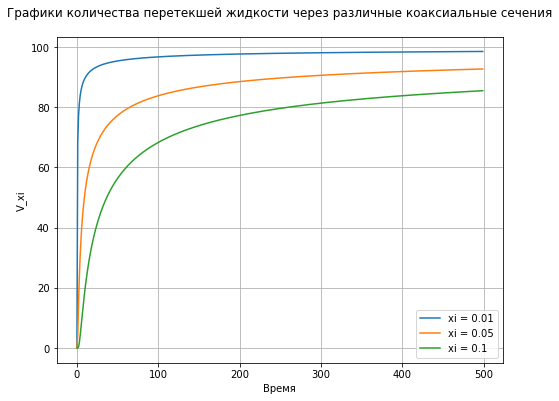

In [12]:
t = np.arange(1e-10,500,1)
xi_1 = 0.01
xi_2 = 0.05
xi_3 = 0.10


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)


ax1.plot(t,v_xi_a(0,t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,v_xi_a(0,t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,v_xi_a(0,t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.set_xlabel("Время")
ax1.set_ylabel("V_xi")
ax1.grid()
ax1.set_title('''Графики количества перетекшей жидкости через различные коаксиальные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

# Работа с постоянным дебитом

## Формула, позволяющая определить понижение давления в любой момент времени в любой точке пласта после пуска точечного стока с постоянным дебитом
### Формула (4.10) стр. 130
$$\Delta p = \dfrac{Q_c \mu \xi}{4 \sigma Г(\dfrac{1}{2}) k} Г(-\dfrac{1}{2},\dfrac{\xi^2}{4\kappa t})$$

### Формула (4.13) стр. 131
$$\Delta p = \dfrac{Q_c \mu }{2 \sigma k}\sqrt{4\kappa t}   ierfc\sqrt{\dfrac{\xi^2}{4\kappa t}}$$

In [13]:
def deltaP_Qc_0(t, xi, qc=0.0001, mu=5e-4, betta=0.0003, k=3e-4,kpr=1e-11, sigma = 1):
    # Qc - [m^3/с] - объемный дебит жидкости
    # mu - [Pa*c] - вязкость
    # betta - [MPa^(-1)] коэффициент упругоемкости пласта
    # k -[м^2/c]- пьезопроводность
    # kpr - [м^2] - проницаемость
    # t -[c]- время
    # xi -[м]- расстояние
    # sigma - площадь поперечного сечения 
    return  qc * mu * (4 * k * t) ** (1 / 2) / (2 * sigma * kpr) * (1 / (3.14) ** (1 / 2) * np.exp(-xi ** 2 / 4 / k / t)-(xi ** 2 / 4 / k / t)**(1 / 2)*sc.erfc((xi ** 2 / 4 / k / t)**(1 / 2)))



## Расаход. жидкости $$Q_\xi$$  через поперечное сечение потока $$ \xi = const $$
### Формула (4.19) стр. 132
$$Q_\xi=Q_c erfc\sqrt{\dfrac{\xi^2}{4\kappa t}}$$

In [14]:
def q_xi_Qc_0(t, xi, qc=0.0001, k=3e-4):
    # qc - [m^3/с] - объемный дебит жидкости
    # k -[м^2/c]- пьезопроводность
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * sc.erfc((xi ** 2 / 4 / k / t) ** (1 / 2))

## Количество жидкости, которая к моменту времени t протечет через постоянное сечение потока
### Формула (4.28) стр. 134
$$ V_\xi = Q_c* t *(erfc\sqrt{\dfrac{\xi^2}{4\kappa t}} - 2\sqrt{\dfrac{\xi^2}{4\kappa t}} ierfc\sqrt{\dfrac{\xi^2}{4\kappa t}})$$
### Формула (4.28 бис) стр. 134
$$ V_\xi = 4*Q_c* t *i^2erfc\sqrt{\dfrac{\xi^2}{4\kappa t}}$$

In [15]:
def v_xi_Qc_0(t, xi, qc=0.0001, k=3e-4):
    # qc - [m^3/с] - объемный дебит жидкости
    # k -[м^2/c]- пьезопроводность
    # t -[c]- время
    # xi -[м]- расстояние
    return 4 * qc * t * (1 / 4 * (1 + 2 * ((xi ** 2 / 4 / k / t) ** (1/2)) ** 2))*sc.erfc((xi ** 2 / 4 / k / t) ** (1/2))-((xi ** 2 / 4 / k / t) ** (1/2)) / (2 * (3.14) ** (1 / 2)) * np.exp(-((xi ** 2 / 4 / k / t) ** (1/2))**2)

## График понижения пластового давления
## рис. 4.1

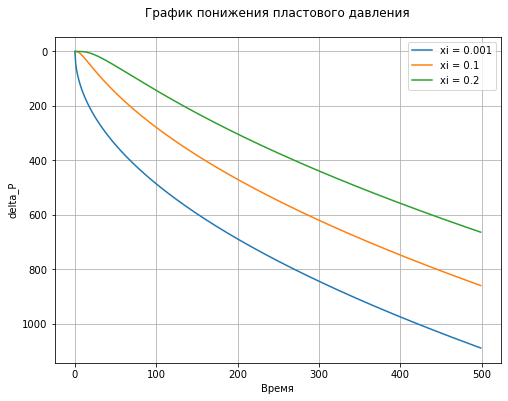

In [17]:
t = np.arange(1e-10,500,1)
xi_1 = 0.001
xi_2 = 0.1
xi_3 = 0.2


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,deltaP_Qc_0(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,deltaP_Qc_0(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,deltaP_Qc_0(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set(title = "")
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
ax1.legend()
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)

plt.show()

## График пьезометрических линий в различные моменты времени
## рис. 4.4

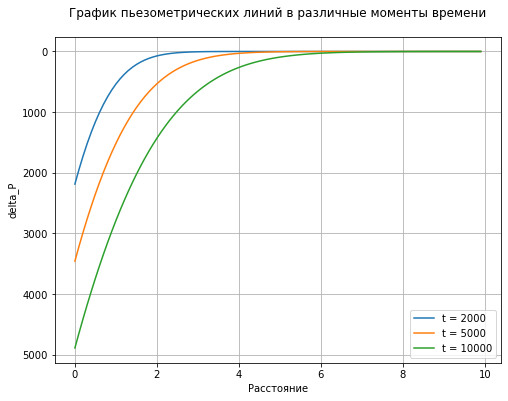

In [18]:
xi = np.arange(1e-10,10,0.1)
t_1 = 2000
t_2 = 5000
t_3 = 10000


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
plt.gca().invert_yaxis()
ax1.plot(xi,deltaP_Qc_0(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,deltaP_Qc_0(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,deltaP_Qc_0(t_3,xi), label = 't = {}'.format(t_3))


ax1.grid()
ax1.set(title = "")
ax1.set_xlabel("Расстояние")
ax1.set_ylabel("delta_P")
ax1.legend()
ax1.set_title('''График пьезометрических линий в различные моменты времени''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)

plt.show()

## Графики изменения расходов жидкости, протекающих через различные сечения
## рис. 4.7

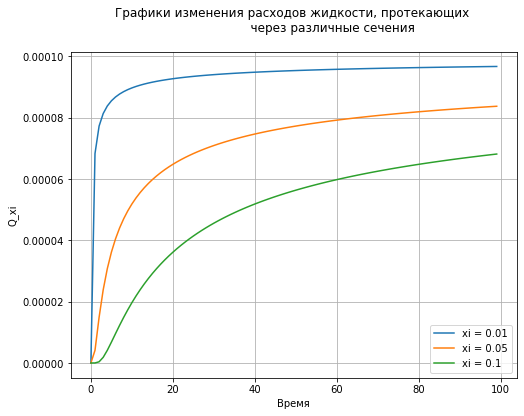

In [19]:
t = np.arange(1e-10,100,1)
xi_1 = 0.01
xi_2 = 0.05
xi_3 = 0.10


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,q_xi_Qc_0(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,q_xi_Qc_0(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,q_xi_Qc_0(t,xi_3), label = 'xi = {}'.format(xi_3))

ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("Q_xi")
ax1.set_title('''Графики изменения расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Графики  расходов жидкости, протекающих через различные сечения
## рис. 4.8

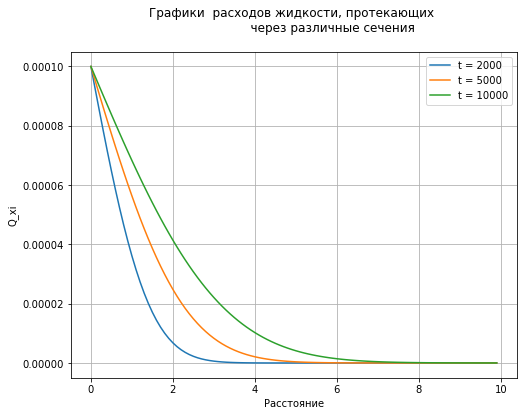

In [20]:
xi = np.arange(1e-10,10,0.1)
t_1 = 2000
t_2 = 5000
t_3 = 10000


fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(8, 6)
ax1.plot(xi,q_xi_Qc_0(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,q_xi_Qc_0(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,q_xi_Qc_0(t_3,xi), label = 't = {}'.format(t_3))


ax1.grid()
ax1.set_xlabel("Расстояние")
ax1.set_ylabel("Q_xi")
ax1.set_title('''Графики  расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Графики изменения расходов жидкости, протекающих через различные сечения
## рис. 4.10

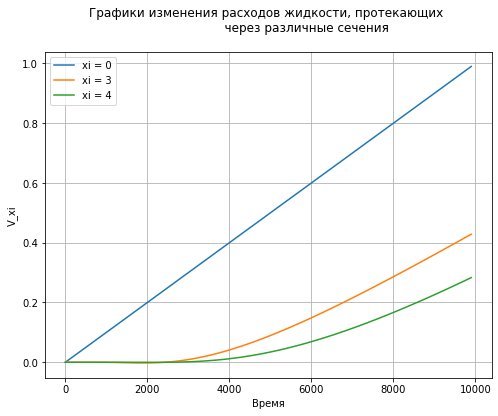

In [21]:

t = np.arange(1e-10,10000,100)
xi_1 = 0
xi_2 = 3
xi_3 = 4


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,v_xi_Qc_0(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,v_xi_Qc_0(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,v_xi_Qc_0(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("V_xi")
ax1.set_title('''Графики изменения расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()